<a href="https://colab.research.google.com/github/luanakwon/ML_Pytorch_pre2022/blob/main/MaskClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask Classification
---
Simple CNN model for wearing-mask classification task.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optimizer
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#hyper parameter

path_mask = 'drive/MyDrive/MaskClassifier/train_data/'
path_test = 'drive/MyDrive/MaskClassifier/test_data/'
save_path = 'drive/MyDrive/NN_saves/MaskClassifierM2.pth'

epoch = 10
batch_size = 64
lr = 0.001
num_workers = 2

image_size = 64
sc = 2 #scale factor of channels 

In [ ]:
dataset=dsets.ImageFolder(root=path_mask,
                         transform=transforms.Compose([                
                          transforms.Resize((image_size,image_size)),
                          transforms.Grayscale(num_output_channels=1),
                          transforms.ToTensor(),
                          transforms.Normalize((0.5),(0.5))                           
                         ]))
print(dataset)
dataloader=DataLoader(dataset,batch_size=batch_size, 
                      shuffle=True,num_workers=num_workers, drop_last=True)


dataset=dsets.ImageFolder(root=path_test,
                         transform=transforms.Compose([                
                          transforms.Resize((image_size,image_size)),
                          transforms.Grayscale(num_output_channels=1),
                          transforms.ToTensor(),
                          transforms.Normalize((0.5),(0.5))                           
                         ]))
print(dataset)
testloader=DataLoader(dataset,batch_size=batch_size, 
                      shuffle=True,num_workers=num_workers, drop_last=True)

Dataset ImageFolder
    Number of datapoints: 1184
    Root location: drive/MyDrive/MaskClassifier/train_data/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Dataset ImageFolder
    Number of datapoints: 192
    Root location: drive/MyDrive/MaskClassifier/test_data/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


torch.Size([64, 1, 64, 64])
tensor([1, 0, 0, 0, 1, 1, 1, 1, 0, 1])


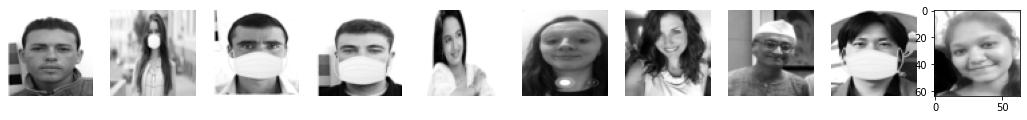

In [ ]:
for (image,label) in dataloader:
  print(image.shape)
  print(label[:10])
  plt.figure(figsize=(20,20))
  
  for i in range(10):
    plt.axis('off')
    plt.subplot(1,11,i+1)
    plt.imshow(image[i][0],cmap='gray')
  break

plt.show()

In [ ]:
# class MaskClassifier(nn.Module):
#   def __init__(self):
#     super(MaskClassifier,self).__init__()
#     self.layer_conv = nn.Sequential(
#         # 1*64*64
#         nn.Conv2d(1,sc,kernel_size=5,stride=1,padding=2),
#         nn.BatchNorm2d(sc),
#         nn.ReLU(),
#         nn.Conv2d(sc,sc**2,kernel_size=5,stride=1,padding=2),
#         nn.BatchNorm2d(sc**2),
#         nn.ReLU(),
#         nn.MaxPool2d(2,2),
#         # 4*32*32
#         nn.Conv2d(sc**2,sc**3,kernel_size=5,stride=1,padding=2),
#         nn.BatchNorm2d(sc**3),
#         nn.ReLU(),
#         nn.Conv2d(sc**3,sc**4,kernel_size=5,stride=1,padding=2),
#         nn.BatchNorm2d(sc**4),
#         nn.ReLU(),
#         nn.MaxPool2d(2,2),
#         # 16*16*16
#         nn.Conv2d(sc**4,sc**5,kernel_size=5,stride=1,padding=2),
#         nn.BatchNorm2d(sc**5),
#         nn.ReLU(),
#         nn.Conv2d(sc**5,sc**6,kernel_size=5,stride=1,padding=2),
#         nn.BatchNorm2d(sc**6),
#         nn.ReLU(),
#         nn.MaxPool2d(2,2)
#         # 64*8*8
#     )
#     self.layer_fc = nn.Sequential(
#         nn.Linear(sc**6*8*8,1),
#         nn.Sigmoid()
#     )
    
#   def forward(self, input, batch_size):
#     out = self.layer_conv(input)
#     out = out.view(batch_size,-1)
#     out = self.layer_fc(out)
#     return out
  

In [ ]:
class MaskClassifier(nn.Module):
  def __init__(self):
    super(MaskClassifier,self).__init__()
    self.layer_conv1 = nn.Sequential(
        # 1*64*64
        nn.Conv2d(1,sc,kernel_size=5,stride=1,padding=2),
        nn.BatchNorm2d(sc),
        nn.ReLU(),
        nn.Conv2d(sc,sc**2,kernel_size=5,stride=1,padding=2),
        nn.BatchNorm2d(sc**2),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.layer_conv2 = nn.Sequential(
        # 4*32*32
        nn.Conv2d(sc**2,sc**3,kernel_size=5,stride=1,padding=2),
        nn.BatchNorm2d(sc**3),
        nn.ReLU(),
        nn.Conv2d(sc**3,sc**4,kernel_size=5,stride=1,padding=2),
        nn.BatchNorm2d(sc**4),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.layer_conv3 = nn.Sequential(
        # 16*16*16
        nn.Conv2d(sc**4,sc**5,kernel_size=5,stride=1,padding=2),
        nn.BatchNorm2d(sc**5),
        nn.ReLU(),
        nn.Conv2d(sc**5,sc**6,kernel_size=5,stride=1,padding=2),
        nn.BatchNorm2d(sc**6),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
        # 64*8*8
    )
    self.layer_fc = nn.Sequential(
        nn.Linear(sc**6*8*8,1),
        nn.Sigmoid()
    )
    
  # def forward(self, input, batch_size):
  #   out = self.layer_conv1(input)
  #   out = self.layer_conv2(out)
  #   out = self.layer_conv3(out)
  #   out = out.view(batch_size,-1)
  #   out = self.layer_fc(out)
  #   return out

  def forward(self,input,batch_size):
    out = []
    out.append(self.layer_conv1(input))
    out.append(self.layer_conv2(out[0]))
    out.append(self.layer_conv3(out[1]))
    out.append(out[2].view(batch_size,-1))
    out[3] = self.layer_fc(out[3])

    return out
  

In [ ]:
device = torch.device('cuda') if (torch.cuda.is_available())else torch.device('cpu')
MaskClassifier = nn.DataParallel(MaskClassifier()).to(device)

print(device)
print(MaskClassifier)

cuda
DataParallel(
  (module): MaskClassifier(
    (layer_conv1): Sequential(
      (0): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(2, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (layer_conv2): Sequential(
      (0): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [ ]:
loss_func = nn.BCELoss()

optim = optimizer.Adam(MaskClassifier.parameters(),lr=lr,betas=(0.5,0.999))

In [ ]:
loss_list = []
test_loss_list = []
for e in range(epoch):
  for batch_index,(image,label) in enumerate(dataloader):
    label = label.float().to(device)
    optim.zero_grad()

    out = MaskClassifier.forward(image,batch_size)[3]
    out = out.view(batch_size)

    out_rev = MaskClassifier.forward(torch.Tensor(1-image.numpy()),batch_size)[3]
    out_rev = out_rev.view(-1)
    
    loss = loss_func(out,label) + loss_func(out_rev,label)
    loss.backward()
    optim.step()
    
    loss_list.append(loss.data)
    print("\r[%d/%d] %d loss : %f"%(
        e,epoch,batch_index,loss.data),end='')
    
  test_loss = 0
  for image, label in testloader:
    with torch.no_grad():
      label = label.float().to(device)
      out = MaskClassifier.forward(image,batch_size)[3].view(-1)
      out_rev = MaskClassifier.forward(torch.Tensor(1-image.numpy()),batch_size)[3].view(-1)

      loss = loss_func(out,label) + loss_func(out_rev,label)
      test_loss += loss.data
  test_loss /= len(testloader)
  test_loss_list.append(test_loss)
  print()

[0/10] 17 loss : 0.665175
[1/10] 17 loss : 0.287932
[2/10] 17 loss : 0.294862
[3/10] 17 loss : 0.176791
[4/10] 17 loss : 0.108499
[5/10] 17 loss : 0.146295
[6/10] 17 loss : 0.039881
[7/10] 17 loss : 0.028032
[8/10] 17 loss : 0.049651
[9/10] 17 loss : 0.016361


180
[tensor(0.6372, device='cuda:0'), tensor(0.3723, device='cuda:0'), tensor(0.3159, device='cuda:0'), tensor(0.4370, device='cuda:0'), tensor(0.2894, device='cuda:0'), tensor(0.3017, device='cuda:0'), tensor(0.3400, device='cuda:0'), tensor(0.4052, device='cuda:0'), tensor(0.3196, device='cuda:0'), tensor(0.2929, device='cuda:0')]


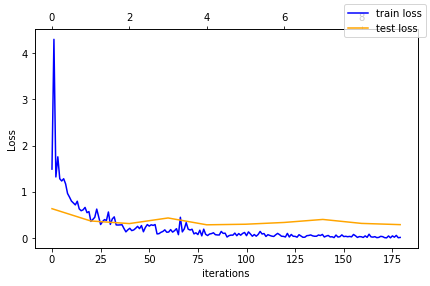

In [ ]:
print(len(loss_list))
print(test_loss_list)
fig, ax1 = plt.subplots()
ax1.set_xlabel('iterations')
ax1.set_ylabel('Loss')
ax1.plot(loss_list,label = 'train loss',color='blue')

ax2 = ax1.twiny()

ax2.plot(test_loss_list, label='test loss',color='orange')


fig.legend()
fig.tight_layout()
plt.show()

# plt.figure(figsize=(10,5))
# plt.title('Loss')
# plt.plot(loss_list, label='loss')
# plt.xlabel("iterations")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

In [ ]:
test_loss = []
for image, label in testloader:
  with torch.no_grad():
    label = label.float().to(device)
    out = MaskClassifier.forward(image,batch_size)[3].view(-1)
    out_rev = MaskClassifier.forward(torch.Tensor(1-image.numpy()),batch_size)[3].view(-1)

    loss = loss_func(out,label) + loss_func(out_rev,label)
    test_loss.append(loss)

print(test_loss)
print(loss_list[-20:-1])
print(sum(test_loss)/len(test_loss))
print(sum(loss_list[-20:-1])/20)

[tensor(0.5569, device='cuda:0'), tensor(0.2184, device='cuda:0'), tensor(0.1254, device='cuda:0')]
[tensor(0.0162, device='cuda:0'), tensor(0.0497, device='cuda:0'), tensor(0.0190, device='cuda:0'), tensor(0.0861, device='cuda:0'), tensor(0.0293, device='cuda:0'), tensor(0.0235, device='cuda:0'), tensor(0.0332, device='cuda:0'), tensor(0.0121, device='cuda:0'), tensor(0.0178, device='cuda:0'), tensor(0.0402, device='cuda:0'), tensor(0.0336, device='cuda:0'), tensor(0.0119, device='cuda:0'), tensor(0.0072, device='cuda:0'), tensor(0.0490, device='cuda:0'), tensor(0.0083, device='cuda:0'), tensor(0.0499, device='cuda:0'), tensor(0.0221, device='cuda:0'), tensor(0.0607, device='cuda:0'), tensor(0.0101, device='cuda:0')]
tensor(0.3003, device='cuda:0')
tensor(0.0290, device='cuda:0')


Guess : 
[(0.0, True), (1.0, False), (0.994, False), (0.999, False), (1.0, False), (0.999, False), (0.293, True), (0.996, False), (0.0, True), (0.001, True)]
Answer: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


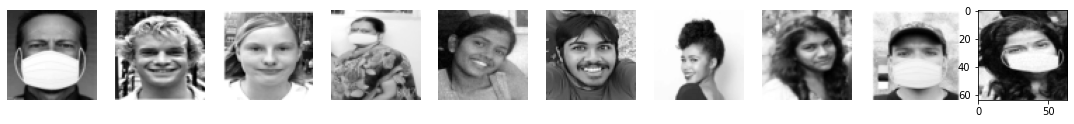

In [ ]:
for (image,label) in testloader:
  with torch.no_grad():
    label = label.float().to(device)
    out = MaskClassifier.forward(image[:10],10)[3].view(10)
    print("Guess : \n{}".format([(round(x.item(),3),x.item()<0.5) for i,x in enumerate(out)]))
    print("Answer: {}".format([round(x.item(),1) for x in label[:10]]))

    plt.figure(figsize=(19,19))
    for i in range(10):
      plt.axis('off')
      plt.subplot(1,10,i+1)
      plt.imshow(image[i][0],cmap='gray')

    break

In [ ]:
torch.save(MaskClassifier.state_dict(),save_path)

In [ ]:
MaskClassifier.load_state_dict(torch.load(save_path))

<All keys matched successfully>

guess: 0.887940, ans: 1.000000 	 inv 	guess: 0.064480, ans: 0.000000 
guess: 0.228230, ans: 0.000000 	 inv 	guess: 0.559850, ans: 0.000000 
guess: 0.897621, ans: 1.000000 	 inv 	guess: 0.702759, ans: 1.000000 
guess: 0.918544, ans: 1.000000 	 inv 	guess: 0.911485, ans: 1.000000 
guess: 0.574137, ans: 0.000000 	 inv 	guess: 0.134341, ans: 0.000000 
guess: 0.684277, ans: 1.000000 	 inv 	guess: 0.044861, ans: 0.000000 
guess: 0.107237, ans: 0.000000 	 inv 	guess: 0.074325, ans: 0.000000 
guess: 0.965545, ans: 1.000000 	 inv 	guess: 0.060114, ans: 0.000000 
guess: 0.943894, ans: 1.000000 	 inv 	guess: 0.959229, ans: 1.000000 
guess: 0.908508, ans: 1.000000 	 inv 	guess: 0.179895, ans: 0.000000 
guess: 0.057645, ans: 0.000000 	 inv 	guess: 0.083324, ans: 0.000000 
guess: 0.213438, ans: 0.000000 	 inv 	guess: 0.362632, ans: 0.000000 
guess: 0.223485, ans: 0.000000 	 inv 	guess: 0.208560, ans: 0.000000 
guess: 0.433519, ans: 0.000000 	 inv 	guess: 0.116402, ans: 0.000000 
guess: 0.914860, ans

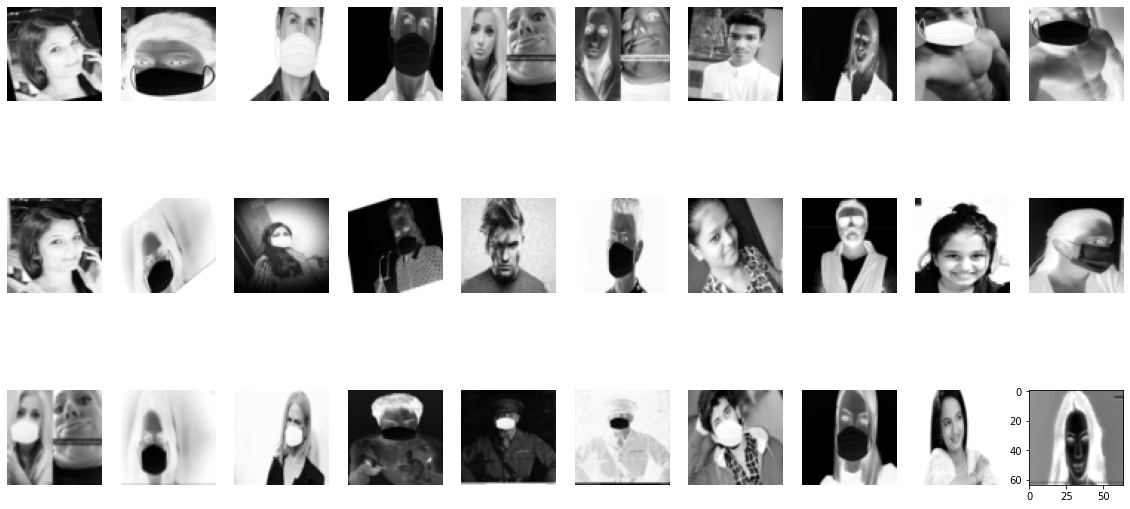

In [ ]:
worst = []

for (image,label) in dataloader:
  with torch.no_grad():
    out = MaskClassifier.forward(image,batch_size)[3]
    invImage = torch.Tensor((1-image.numpy()))
    out_rev = MaskClassifier.forward(invImage,batch_size)[3]

    label = label.float().to(device)

    index = np.argmax(torch.abs(out.view(-1) - label).cpu())
    worst.append(image[index][0])
    print('guess: %f, ans: %f '%(out[index][0],label[index]),end='')

    index = np.argmax(torch.abs(out_rev.view(-1) - label).cpu())
    worst.append(invImage[index][0])
    print('\t inv \tguess: %f, ans: %f '%(out_rev[index][0],label[index]))
    
plt.figure(figsize=(20,10))
for i in range(30):
  plt.axis('off')
  plt.subplot(3,10,i+1)
  plt.imshow(worst[i],cmap='gray')
  

plt.show()


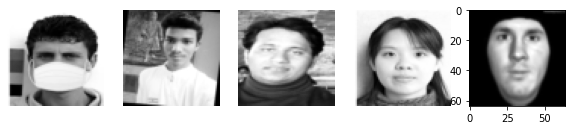

mid-result 1


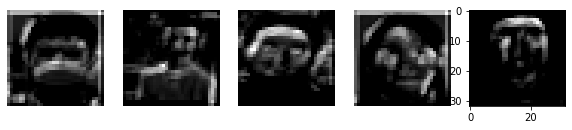

mid-result 2


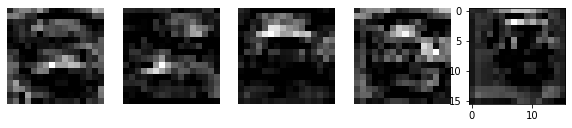

mid-result 3


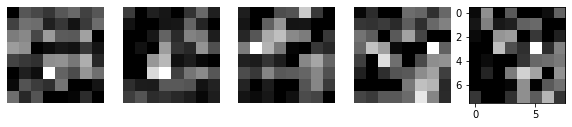

tensor([[1.5557e-05],
        [9.2447e-01],
        [9.9442e-01],
        [9.7449e-01],
        [9.9998e-01]], device='cuda:0')


In [ ]:
for image,label in dataloader:
  with torch.no_grad():
    out = MaskClassifier.forward(image,batch_size)

    plt.figure(figsize=(10,5))
    plt.title('original image')
    for i in range(5):
      plt.axis('off')
      plt.subplot(1,5,i+1)
      plt.imshow(image[i][0],cmap='gray')
    plt.show()

    print('mid-result 1')

    plt.figure(figsize=(10,5))
    for i in range(5):
      plt.axis('off')
      plt.subplot(1,5,i+1)
      plt.imshow(out[0].cpu()[i][0],cmap='gray')
    plt.show()

    print('mid-result 2')

    plt.figure(figsize=(10,5))
    for i in range(5):
      plt.axis('off')
      plt.subplot(1,5,i+1)
      plt.imshow(out[1].cpu()[i][0],cmap='gray')
    plt.show()

    print('mid-result 3')

    plt.figure(figsize=(10,5))
    for i in range(5):
      plt.axis('off')
      plt.subplot(1,5,i+1)
      plt.imshow(out[2].cpu()[i][0],cmap='gray')
    plt.show()

    print(out[3][:5])
    break